In [35]:
import tensorflow as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import os
import cv2 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
filenames = os.listdir("./cats-vs-dogs/train/train")

categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append('dog')
    else:
        categories.append('cat')
df = pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [37]:
df.head()

filename category
0     cat.0.jpg      cat
1     cat.1.jpg      cat
2    cat.10.jpg      cat
3   cat.100.jpg      cat
4  cat.1000.jpg      cat

<Axes: >

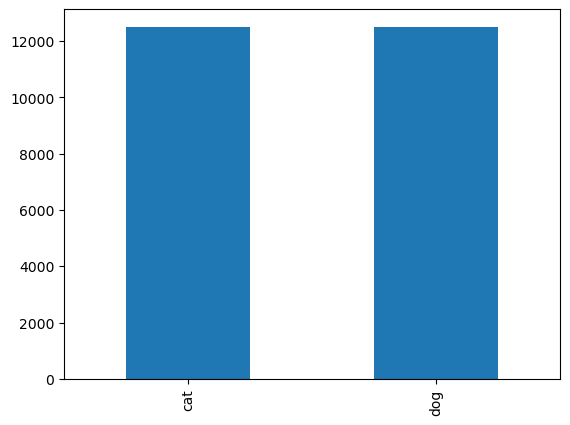

In [38]:
df['category'].value_counts().plot.bar()

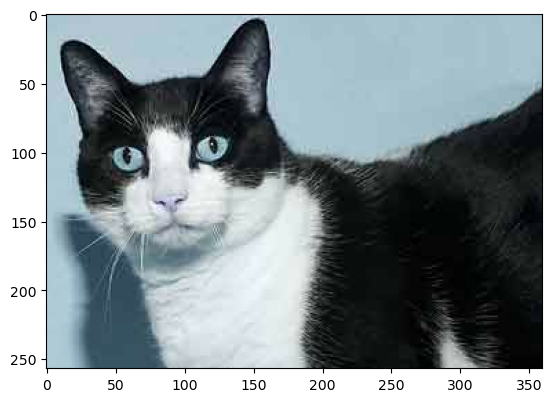

In [39]:
import random
sample = random.choice(filenames)
image = cv2.imread("./cats-vs-dogs/train/train/"+sample)
plt.imshow(image)

In [40]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_CHANNELS = 3
IMAGE_SIZE = (128,128)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(64,(2,2), activation='relu',input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128,(2,2), activation='relu',input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2,activation='softmax'))

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 127, 127, 64)      832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 63, 63, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 128)       32896     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 128)      0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 31, 31, 128)      

In [42]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
from sklearn.model_selection import train_test_split
train_df,validate_df=train_test_split(df, test_size=0.20, random_state=42)
train_df=train_df.reset_index(drop=True)
validate_df=validate_df.reset_index(drop=True)

In [44]:
print(train_df.shape)
print(validate_df.shape)

(20000, 2)
(5000, 2)


In [45]:
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15
print(train_df.shape[0],validate_df.shape[0])

20000 5000


In [46]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [47]:
train_generator = train_datagen.flow_from_dataframe(
train_df,
"./cats-vs-dogs/train/train/",
x_col='filename',
y_col='category',
target_size=IMAGE_SIZE,
class_node="categorical",
batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.


In [48]:
validation_datagen = ImageDataGenerator (rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
validate_df,
"./cats-vs-dogs/train/train/",
x_col="filename",
y_col="category",
target_size=IMAGE_SIZE,
class_mode="categorical",
batch_size= batch_size)

Found 5000 validated image filenames belonging to 2 classes.


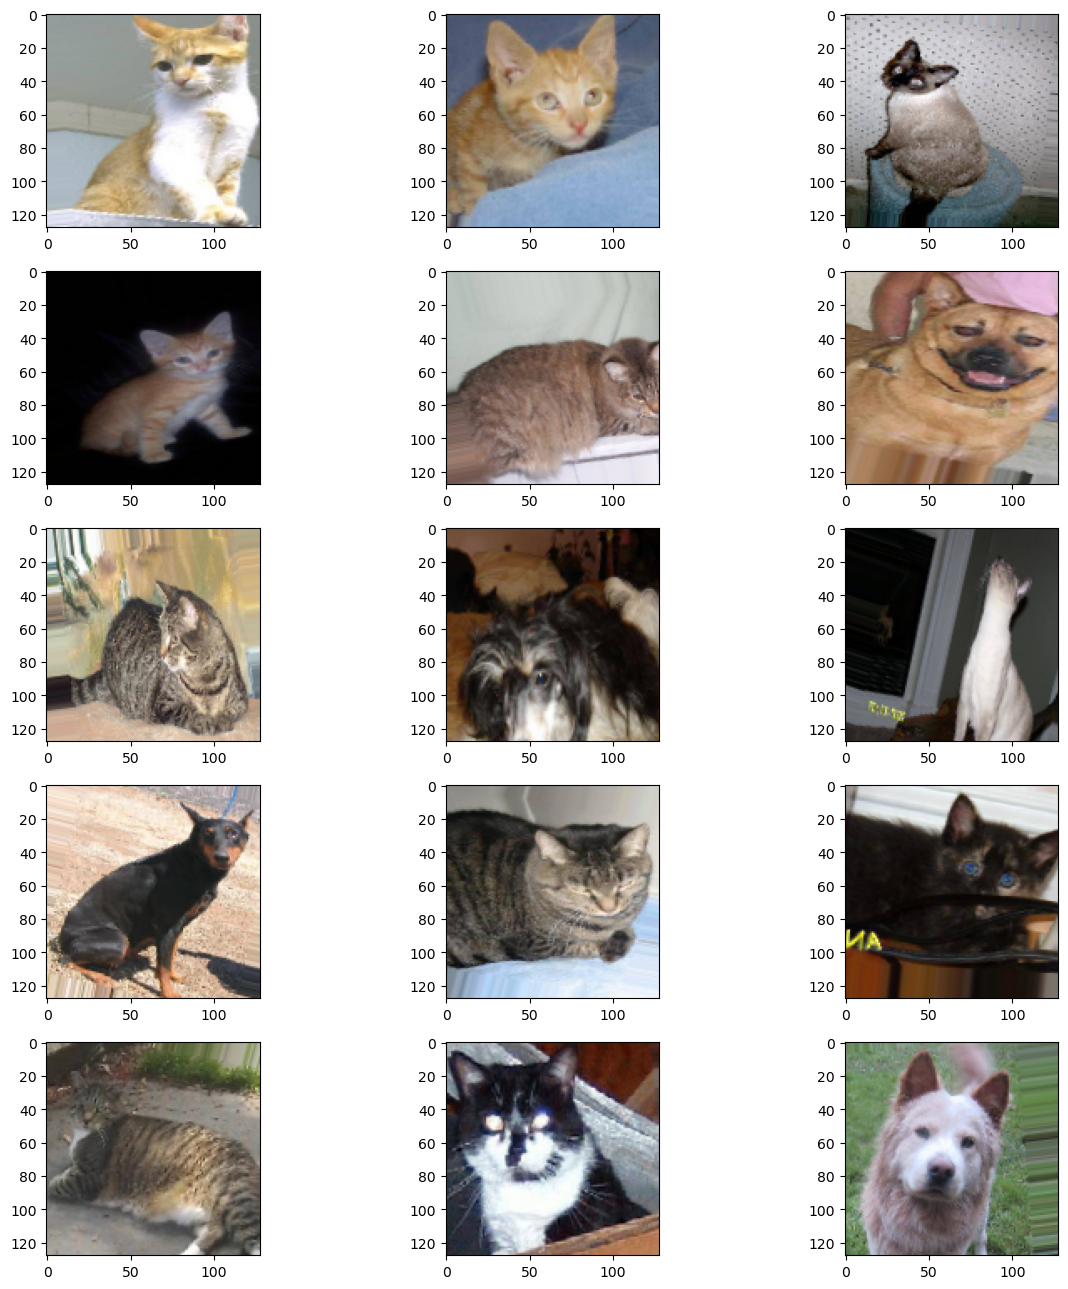

In [49]:
plt.figure(figsize=(13, 13))

for i in range(0, 15):

    plt.subplot(5, 3, i+1)

    for X_batch, Y_batch in train_generator:

        image = X_batch[0]

        plt.imshow(image)

        break

plt.tight_layout()

plt.show()

In [50]:
hist = model.fit(
train_generator,
epochs=10,
validation_data=validation_generator,
validation_steps=total_validate//batch_size,
steps_per_epoch=total_train//batch_size)

Epoch 1/10
1333/1333 [==============================] - 433s 324ms/step - loss: 0.6948 - accuracy: 0.5844 - val_loss: 0.6175 - val_accuracy: 0.6645
Epoch 2/10
1333/1333 [==============================] - 436s 327ms/step - loss: 0.6046 - accuracy: 0.6759 - val_loss: 0.5381 - val_accuracy: 0.7245
Epoch 3/10
1333/1333 [==============================] - 431s 324ms/step - loss: 0.5656 - accuracy: 0.7074 - val_loss: 0.5462 - val_accuracy: 0.7271
Epoch 4/10
1333/1333 [==============================] - 428s 321ms/step - loss: 0.5438 - accuracy: 0.7241 - val_loss: 0.5080 - val_accuracy: 0.7520
Epoch 5/10
1333/1333 [==============================] - 443s 332ms/step - loss: 0.5230 - accuracy: 0.7418 - val_loss: 0.4891 - val_accuracy: 0.7588
Epoch 6/10
1333/1333 [==============================] - 483s 362ms/step - loss: 0.5144 - accuracy: 0.7468 - val_loss: 0.5015 - val_accuracy: 0.7604
Epoch 7/10
1333/1333 [==============================] - 470s 352ms/step - loss: 0.5034 - accuracy: 0.7558 - val_

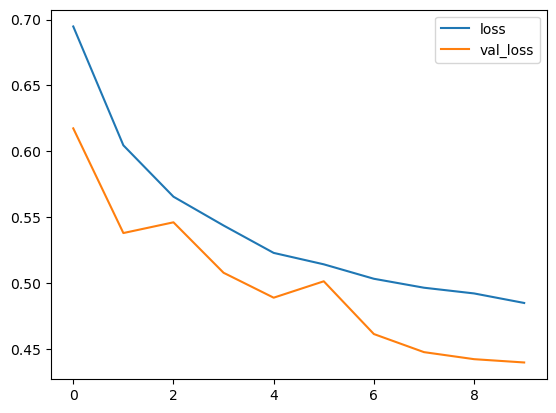

In [51]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

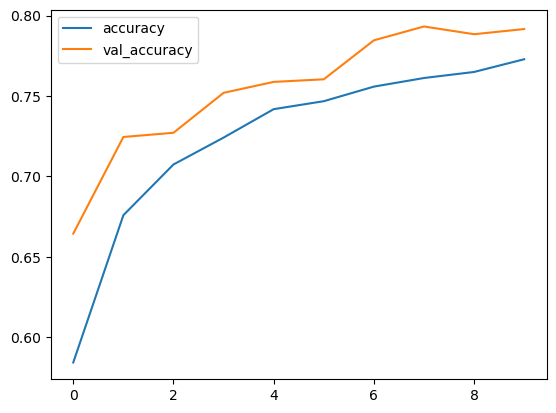

In [52]:
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()